In [1]:
# Linear Regression 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

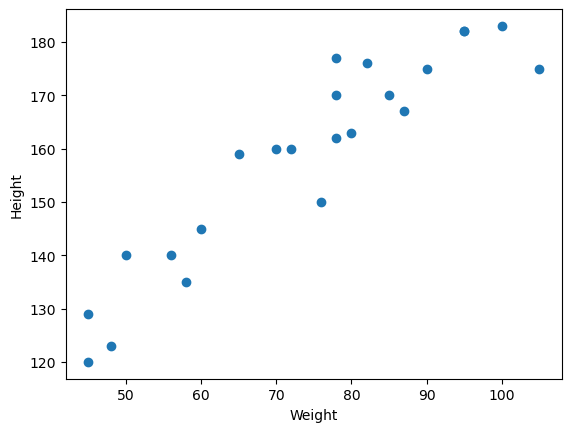

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [7]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [8]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [9]:
# divide the data into dependent and independent features
X = df[['Weight']] #the dependent features must be Columns(2D)
y = df['Height'] #The independent features must be Series

In [10]:
X.shape, y.shape

((23, 1), (23,))

In [11]:
#divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=52) #random_state tells 

In [12]:
print(X_train)

    Weight
14      85
19      87
9       78
18      76
15      78
12     105
1       58
20      45
3       60
17      65
16      50
22      72
10      82
5       78
0       45
13     100
11      95
21      56


In [13]:
print(X_test)

   Weight
7      90
4      70
8      95
2      48
6      80


In [14]:
print(y_train)

14    170
19    167
9     170
18    150
15    177
12    175
1     135
20    129
3     145
17    159
16    140
22    160
10    176
5     162
0     120
13    183
11    182
21    140
Name: Height, dtype: int64


In [15]:

print(y_test)

7    175
4    160
8    182
2    123
6    163
Name: Height, dtype: int64


In [16]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [17]:
y_train.shape, y_test.shape

((18,), (5,))

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
## Using the transform method we can use 
## the same mean and variance as it is 
## calculated from our training data to 
## transform our test data
print(X_train)
print(X_test)

[[ 0.67797711]
 [ 0.79149886]
 [ 0.28065099]
 [ 0.16712924]
 [ 0.28065099]
 [ 1.81319459]
 [-0.8545665 ]
 [-1.59245786]
 [-0.74104475]
 [-0.45724038]
 [-1.30865349]
 [-0.05991426]
 [ 0.50769449]
 [ 0.28065099]
 [-1.59245786]
 [ 1.52939022]
 [ 1.24558585]
 [-0.96808824]]
[[ 0.96178148]
 [-0.173436  ]
 [ 1.24558585]
 [-1.42217524]
 [ 0.39417274]]


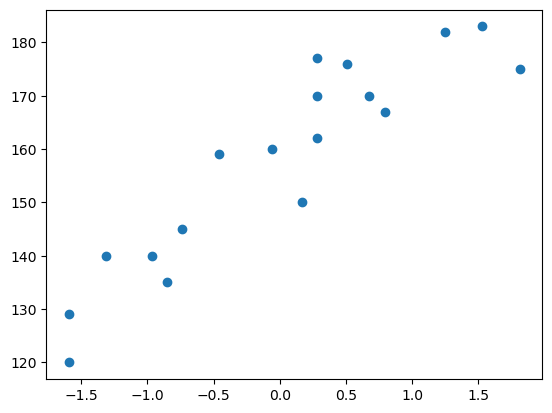

In [21]:
plt.scatter(X_train, y_train)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
## model training start

In [24]:
regressor = LinearRegression()

In [25]:
## training the train data

In [26]:
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
regressor.intercept_

157.77777777777777

In [28]:
regressor.rank_

1

In [29]:
regressor.coef_

array([17.12356449])

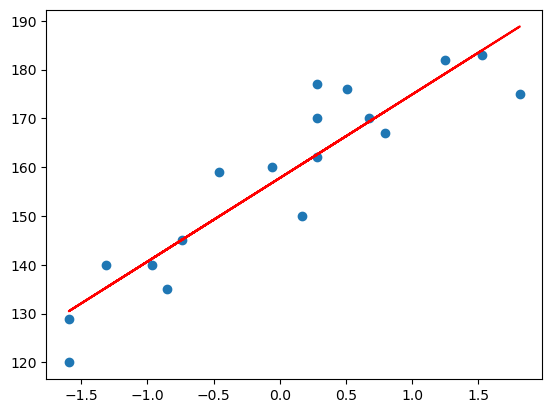

In [30]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), 'r')

### prediction of train data
1.) predicted height output = intercept + coef(weights)<br>
2.) y_pred_train = 157.5 + 17.03(X_train)

### prediction of test data
1.) predicted height output = intercept + coef(weights)<br>
2.) y_pred_test = 157.5 + 17.03(X_test)

In [31]:
## prediction for the test data

In [32]:
y_pred_test = regressor.predict(X_test)
print(y_pred_test)

[174.24690499 154.80793517 179.10664744 133.42506836 164.52742008]


In [33]:
y_test

7    175
4    160
8    182
2    123
6    163
Name: Height, dtype: int64

In [35]:
regressor.predict([[100]])

array([1870.13422672])

## Checking the Cost Functions MAE, MSE, RMSE

In [38]:
from sklearn.metrics import mean_squared_error

In [42]:
mse = mean_squared_error(y_pred = y_pred_test, y_true = y_test)
print(mse)

29.382248168063718


In [45]:
from sklearn.metrics import mean_absolute_error

In [49]:
mae = mean_absolute_error(y_test, y_pred_test)
print(mae)

4.158200169044898


In [51]:
rmse = np.sqrt(mse)
print(rmse)

5.420539472051073


# Checking the Performance Matrices (Accuracy)

## R-Squared test    

In [54]:
from sklearn.metrics import r2_score

In [56]:
r2 = r2_score(y_test, y_pred_test)
print(r2)

0.9295457314212936


# Adjusted R-Squared test

In [60]:
#using the formula

1 - ((1-r2**2)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)

0.8187403557380636